In [1]:
from pathlib import Path

from pipeline import pipeline_to_cart, pipeline_hotspots, pipeline_mcit
from stormcell.stormcell_helpers import create_stormcell_list
from hotspots.assignment import hotspot_assignment, filter_assigned_hotspots
from config import _EXAMPLEDATA_DIR


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



### FULL RECIPE TO GET ASSIGNED HOTSPOTS FROM NEXRAD
Caution: This uses MCIT objects and hotspot objects from the _same_ timestep. Ideally, you would compare hotspots with tracked MCIT cells from the previous timestep! Also note that this is a very challenging case.


In [2]:
filename = Path(_EXAMPLEDATA_DIR, "nexrad_level2",
                "KOAX20140603_213649_V06.gz")  # -10C height = 5188
target_cappi_height = 5188  # m

# get pseudoCAPPI (check target height!) in x,y coordinates (default 1 km grid spacing)
xy_cappi = pipeline_to_cart(filename, target_cappi_height)
# get raw hotspot field and labels (marking the objects)
hs_field, hs_label = pipeline_hotspots(xy_cappi)
# get the MCIT cells
mcit_final = pipeline_mcit(xy_cappi)

# create hotspot and MCIT objects
hotspot_objects = create_stormcell_list(hs_label, hs_field)
mcit_objects = create_stormcell_list(mcit_final, xy_cappi['vil'])
xy_cappi['MCIT_FINAL'] = mcit_final

# assign hotspots to MCIT cells and write the results to a dictionary
merged_obj = hotspot_assignment(mcit_objects, hotspot_objects)

# remove the unassigned hotspots
hs_final = filter_assigned_hotspots(hs_label, merged_obj)
xy_cappi['HS_FINAL'] = hs_final

2024-11-22 11:12:19,508 [MainThread  ] [INFO ]  1 of 14 current_elev: 0.48
2024-11-22 11:12:19,660 [MainThread  ] [INFO ]  num_sweeps: 14, num_azs: 360, num_gates: 1200
2024-11-22 11:12:19,660 [MainThread  ] [INFO ]  2 of 14 current_elev: 0.88
2024-11-22 11:12:19,812 [MainThread  ] [INFO ]  num_sweeps: 14, num_azs: 360, num_gates: 1200
2024-11-22 11:12:19,813 [MainThread  ] [INFO ]  3 of 14 current_elev: 1.32
2024-11-22 11:12:19,962 [MainThread  ] [INFO ]  num_sweeps: 14, num_azs: 360, num_gates: 1200
2024-11-22 11:12:19,962 [MainThread  ] [INFO ]  4 of 14 current_elev: 1.80
2024-11-22 11:12:20,095 [MainThread  ] [INFO ]  num_sweeps: 14, num_azs: 360, num_gates: 1200
2024-11-22 11:12:20,096 [MainThread  ] [INFO ]  5 of 14 current_elev: 2.42
2024-11-22 11:12:20,227 [MainThread  ] [INFO ]  num_sweeps: 14, num_azs: 360, num_gates: 1200
2024-11-22 11:12:20,228 [MainThread  ] [INFO ]  6 of 14 current_elev: 3.12
2024-11-22 11:12:20,356 [MainThread  ] [INFO ]  num_sweeps: 14, num_azs: 360, nu

### LET'S PLOT SOME HOTSPOT OBJECTS

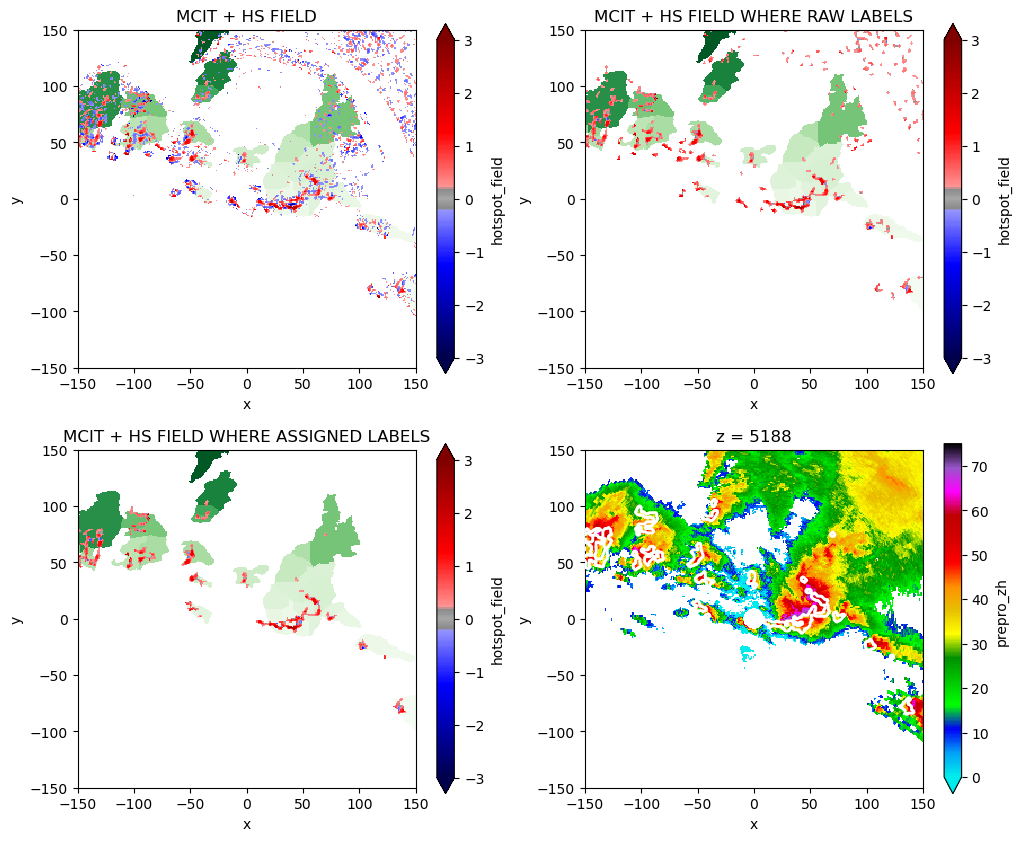

In [3]:
import matplotlib.pyplot as plt
import klaus_krause_cmap

xlim = (-150, 150)
ylim = (-150, 150)
hotspot_min = 0.2
max_id = xy_cappi['MCIT_FINAL'].max()

hs_cmap = klaus_krause_cmap.get_hs_cmap(3)

fig = plt.figure(figsize=(12, 10))

ax1 = fig.add_subplot(221)
ax1.set_aspect('equal')
xy_cappi['MCIT_FINAL'].where(xy_cappi['MCIT_FINAL'] > 0).plot(
    x='x', y='y', vmin=1, vmax=max_id, ax=ax1, cmap='Greens',
    add_colorbar=False, xlim=xlim, ylim=ylim)
hs_field.where(
    (hs_field > hotspot_min) |
    (hs_field < -hotspot_min)).plot(
    x='x', y='y', ax=ax1, vmin=-3, vmax=3, cmap=hs_cmap,
    add_colorbar=True, xlim=xlim, ylim=ylim, cbar_kwargs={'extend': 'both'})
ax1.set_title('MCIT + HS FIELD')


ax2 = fig.add_subplot(222)
ax2.set_aspect('equal')
xy_cappi['MCIT_FINAL'].where(xy_cappi['MCIT_FINAL'] > 0).plot(
    x='x', y='y', vmin=1, vmax=max_id, ax=ax2, cmap='Greens',
    add_colorbar=False, xlim=xlim, ylim=ylim)
hs_field.where(
    (hs_label > 0)).plot(
    x='x', y='y', ax=ax2, vmin=-3, vmax=3, cmap=hs_cmap,
    add_colorbar=True, xlim=xlim, ylim=ylim, cbar_kwargs={'extend': 'both'})
ax2.set_title('MCIT + HS FIELD WHERE RAW LABELS')

ax3 = fig.add_subplot(223)
ax3.set_aspect('equal')
xy_cappi['MCIT_FINAL'].where(xy_cappi['MCIT_FINAL'] > 0).plot(
    x='x', y='y', vmin=1, vmax=max_id, ax=ax3, cmap='Greens',
    add_colorbar=False, xlim=xlim, ylim=ylim)
hs_field.where(
    (hs_final > 0)).plot(
    x='x', y='y', ax=ax3, vmin=-3, vmax=3, cmap=hs_cmap,
    add_colorbar=True, xlim=xlim, ylim=ylim, cbar_kwargs={'extend': 'both'})
ax3.set_title('MCIT + HS FIELD WHERE ASSIGNED LABELS')

ax4 = fig.add_subplot(224)
ax4.set_aspect('equal')
xy_cappi['prepro_zh'].plot(
    x='x', y='y', ax=ax4, vmin=0, vmax=75, cmap='pyart_NWSRef',
    add_colorbar=True, xlim=xlim, ylim=ylim)
hs_final.plot.contour(
    x='x', y='y', vmin=0.9, vmax=1.1, levels=[1],
    ax=ax4, colors='w', add_colorbar=False, xlim=xlim, ylim=ylim,
    linewidths=2.1, zorder=11, add_labels=False)

### COMPARISON WITH C++ HOTSPOTS

In [5]:
# get C++ hotspots
import xarray as xr
from pyart.core import geographic_to_cartesian_aeqd
from pyart.io.nexrad_common import get_nexrad_location
filename = Path(_EXAMPLEDATA_DIR, "test", "HotSpotID_00.00_20140603-213650.netcdf.gz")

ds = xr.open_dataset(filename)
radarname = ds.attrs['radarName-value']

lat0, lon0, elev = get_nexrad_location(radarname)

longridspacing = ds.LonGridSpacing
latgridspacing = ds.LatGridSpacing

lon_nw = ds.Longitude
lat_nw = ds.Latitude

old_lon = ds.Lon.copy()
old_lat = ds.Lat.copy()

ds = ds.assign_coords(Lon=(lon_nw + longridspacing * old_lon),
                      Lat=(lat_nw - latgridspacing * old_lat))

x_m, y_m = geographic_to_cartesian_aeqd(ds.Lon, ds.Lat, lon0, lat0)
x_km = x_m/1000.0
y_km = y_m/1000.0
ds = ds.assign_coords(x=("Lon", x_km), y=("Lat", y_km))

Text(0.5, 1.0, 'C++ hotspots')

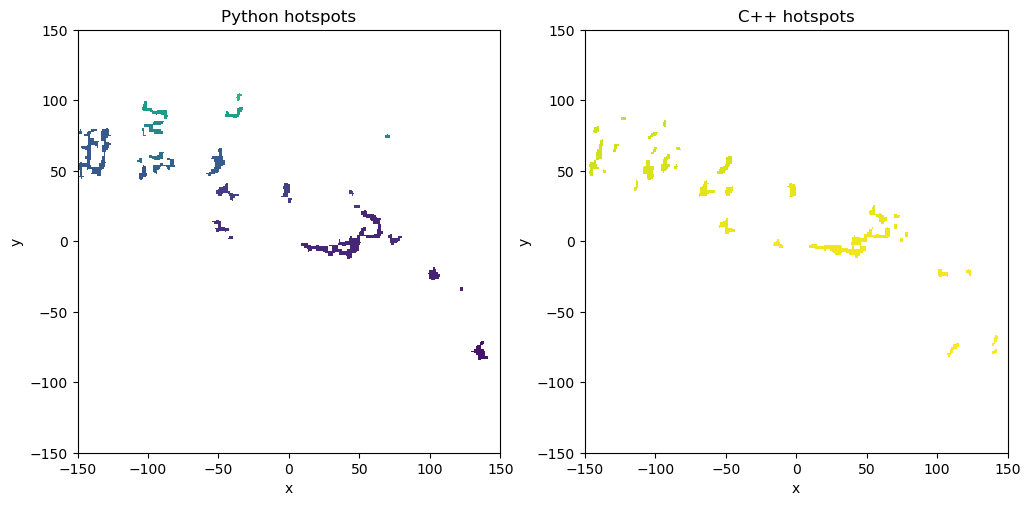

In [6]:
xlim = (-150, 150)
ylim = (-150, 150)

fig = plt.figure(figsize=(12, 7))

ax1 = fig.add_subplot(121)
ax1.set_aspect('equal')
hs_final.where(hs_final > 0).plot(ax=ax1, x='x', y='y', xlim=xlim, ylim=ylim, vmin=0, add_colorbar=False)
ax1.set_title("Python hotspots")

ax2 = fig.add_subplot(122)
ax2.set_aspect('equal')
ds['HotspotID'].where(ds['HotspotID'] > 0).plot(
    ax=ax2, x='x', y='y', xlim=xlim, ylim=ylim, vmin=0, add_colorbar=False)
ax2.set_title('C++ hotspots')